In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately
#### to create a 360-degree view of the data. Use the same for the subsequent questions.

In [203]:
Claims = pd.read_csv(r'C:\Users\user\Desktop\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv')
Cust = pd.read_csv(r'C:\Users\user\Desktop\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [204]:
Claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


In [205]:
Cust.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [206]:
Cust_Claims = pd.merge(Cust,Claims,left_on = 'CUST_ID',right_on = 'customer_id',how = 'outer')

In [207]:
Cust_Claims.drop(columns='customer_id',inplace=True)

In [208]:
Cust_Claims.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes
#### of the columns and their business significance.

In [209]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [210]:
Cust_Claims['claim_date'] = pd.to_datetime(Cust_Claims['claim_date'],format = "%m/%d/%Y")

In [211]:
Cust_Claims['DateOfBirth'] = pd.to_datetime(Cust_Claims['DateOfBirth'],format = "%d-%b-%y")

In [212]:
Cust_Claims['Contact'] = Cust_Claims['Contact'].str.replace('-','').astype(float)

In [213]:
Cust_Claims.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes


In [214]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float64       
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   object        
 13  total_policy_claims  1090 non-nul

#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [215]:
Cust_Claims['claim_amount'] = Cust_Claims['claim_amount'].str.replace('$',' ').astype(float)

In [216]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float64       
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float64       
 13  total_policy_claims  1090 non-nul

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [217]:
Cust_Claims['flag_police_report'] = np.where(Cust_Claims['police_report'] == 'Yes',1,np.where(Cust_Claims['police_report']== 'No',0,np.nan))

In [218]:
Cust_Claims.drop(columns = ['police_report'],inplace=True)

In [219]:
Cust_Claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,Material only,3059.0,4.0,Yes,0.0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,Material only,1520.0,2.0,No,0.0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,Material and injury,23575.0,2.0,Yes,0.0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Material and injury,25120.0,1.0,No,NaN


#### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved.
####  However, customer ID should remain unique. 
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [220]:
Cust_Claims = Cust_Claims.groupby('CUST_ID').first().reset_index(drop=True)

In [221]:
Cust_Claims.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [222]:
Cust_Claims.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag_police_report     299
dtype: int64

In [223]:
Continuous = ["claim_amount"]
Categorical = ["incident_cause","claim_area","claim_type","total_policy_claims","fraudulent","flag_police_report"]
for var in Continuous:
    Cust_Claims[var] = Cust_Claims[var].fillna(Cust_Claims[var].mean())
for var in Categorical:
    Cust_Claims[var] = Cust_Claims[var].fillna(Cust_Claims[var].mode()[0])
Cust_Claims

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0


In [224]:
Cust_Claims.groupby(Cust_Claims['claim_date'].dt.month).claim_id.count().reset_index()

,claim_date,claim_id
0,1.0,105
1,2.0,90
2,3.0,111
3,4.0,102
4,5.0,93
5,6.0,92
6,7.0,106
7,8.0,89
8,9.0,77
9,10.0,121


In [225]:
Cust_Claims.loc[Cust_Claims['claim_date'].isna(),'claim_date'] = pd.Timestamp("2017-10-01")

In [226]:
Cust_Claims.isna().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               7
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag_police_report     0
dtype: int64

#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18, Youth 18-30, Adult 30-60, Senior > 60



In [227]:
Cust_Claims.DateOfBirth.max()


Timestamp('2068-12-19 00:00:00')

In [228]:
Cust_Claims.DateOfBirth.min()

Timestamp('1969-01-01 00:00:00')

In [229]:
Cust_Claims.loc[Cust_Claims['DateOfBirth'].dt.year > 2020]["DateOfBirth"].apply(lambda x:x - pd.DateOffset(years=100))

8      1962-02-17
9      1960-07-29
13     1966-06-08
15     1967-06-23
19     1962-06-24
          ...    
1072   1968-12-06
1075   1968-10-07
1080   1965-01-28
1081   1966-06-19
1082   1963-11-18
Name: DateOfBirth, Length: 246, dtype: datetime64[ns]

In [230]:
Cust_Claims.loc[(Cust_Claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=Cust_Claims[Cust_Claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [231]:
Cust_Claims.loc[Cust_Claims['DateOfBirth'].dt.year > 2020]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report


In [232]:
Cust_Claims['Age'] = (Cust_Claims['claim_date'] - Cust_Claims['DateOfBirth']).apply(lambda x: x.days)/365

In [233]:
Cust_Claims['Age'] = round(Cust_Claims['Age'])

In [234]:
Cust_Claims

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report,Age
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,40.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0,53.0
1081,Female,1966-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0,52.0
1082,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0,54.0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0,22.0


In [235]:
Cust_Claims['Age_Category'] = np.where(Cust_Claims['Age']<18,'Children',np.where(Cust_Claims['Age']<30,'Youth',np.where(Cust_Claims['Age']<60,'Adult','Senior')))

In [236]:
Cust_Claims.groupby('Age_Category').count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report,Age
Age_Category,,,,,,,,,,,,,,,
Adult,763,763,763,763,763,758,763,763,763,763,763,763,763,763,763
Children,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Youth,320,320,320,320,320,318,320,320,320,320,320,320,320,320,320


#### 8. What is the average amount claimed by the customers from various segments?

In [237]:
Cust_Claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12755.710930
Platinum    12370.138663
Silver      12271.163192
Name: claim_amount, dtype: float64

#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [238]:
days_prior = Cust_Claims['claim_date'].max() - pd.DateOffset(days=50)

In [239]:
days_prior

Timestamp('2018-09-10 00:00:00')

In [240]:
Cust_Claims.groupby('incident_cause')['claim_amount'].sum()            

incident_cause
Crime                 7.592525e+05
Driver error          3.517208e+06
Natural causes        1.384761e+06
Other causes          4.309838e+06
Other driver error    3.559431e+06
Name: claim_amount, dtype: float64

In [241]:
Cust_Claims.loc[Cust_Claims['claim_date'] < days_prior].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244625e+05
Driver error          3.264286e+06
Natural causes        1.312706e+06
Other causes          3.812332e+06
Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [242]:
Adult = Cust_Claims.loc[Cust_Claims['Age_Category'] == 'Adult']

In [243]:
Adult.loc[Adult['incident_cause'].isin(['Driver error','Other driver error'])]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report,Age,Age_Category
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,40.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0,Adult
6,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,Material only,2920.000000,2.0,No,0.0,41.0,Adult
8,Male,1962-02-17,HI,3.215345e+09,Platinum,86240106.0,Driver error,2017-07-01,Auto,Material only,2490.000000,2.0,No,0.0,55.0,Adult
10,Female,1980-04-27,WY,5.713972e+09,Platinum,3502909.0,Driver error,2017-03-22,Auto,Injury only,25010.000000,1.0,No,0.0,37.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Male,1971-10-16,CA,9.124189e+09,Gold,24782645.0,Driver error,2017-05-02,Auto,Material only,1120.000000,3.0,No,0.0,46.0,Adult
1071,Female,1978-04-04,GA,5.623192e+09,Platinum,18265792.0,Driver error,2017-04-05,Auto,Material and injury,22540.000000,1.0,No,0.0,39.0,Adult
1072,Male,1968-12-06,VA,6.858235e+09,Silver,25688619.0,Driver error,2017-02-10,Home,Material only,1550.000000,6.0,No,0.0,48.0,Adult
1073,Female,1976-09-02,PA,5.634175e+09,Platinum,44626119.0,Other driver error,2017-12-10,Auto,Material only,2840.000000,1.0,No,0.0,41.0,Adult


In [244]:
Adult.loc[Adult['State'].isin(['TX','DE','AK'])]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag_police_report,Age,Age_Category
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
6,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,Material only,2920.000000,2.0,No,0.0,41.0,Adult
22,Female,1985-12-14,AK,4.985980e+09,Platinum,4506676.0,Other driver error,2018-05-14,Home,Material only,1400.000000,1.0,No,0.0,32.0,Adult
28,Male,1987-10-20,TX,5.861300e+09,Platinum,26716331.0,Other driver error,2017-04-25,Auto,Injury only,17590.000000,4.0,No,0.0,30.0,Adult
37,Female,1964-05-28,AK,5.762765e+09,Gold,80956687.0,Other causes,2018-06-30,Auto,Material and injury,37869.500000,4.0,Yes,0.0,54.0,Adult
40,Male,1982-08-03,AK,7.614623e+09,Platinum,70068.0,Driver error,2017-11-06,Auto,Injury only,29900.000000,1.0,Yes,0.0,35.0,Adult
90,Male,1963-12-11,DE,2.393687e+09,Platinum,40283824.0,Driver error,2018-06-17,Auto,Material and injury,23430.000000,1.0,No,1.0,55.0,Adult
110,Male,1965-11-13,DE,4.295962e+09,Platinum,31574986.0,Driver error,2017-02-03,Auto,Material only,2460.000000,2.0,No,0.0,51.0,Adult
156,Male,1964-02-22,TX,5.836413e+09,Silver,53831641.0,Driver error,2017-09-27,Auto,Material and injury,14570.000000,1.0,No,1.0,54.0,Adult


In [245]:
Adult.loc[(Adult['incident_cause'].isin(['Driver error','Other driver error']))&(Adult['State'].isin(['TX','DE','AK']))].groupby(['State','incident_cause'])['total_policy_claims'].count()

State  incident_cause    
AK     Driver error          5
       Other driver error    3
DE     Driver error          4
       Other driver error    5
TX     Driver error          3
       Other driver error    4
Name: total_policy_claims, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [246]:
Gender_Segment = pd.pivot_table(data = Cust_Claims,index='Segment',columns='gender',values='claim_amount',aggfunc='sum')

In [247]:
Gender_Segment

gender,Female,Male
Segment,,
Gold,2.122234e+06,2.622890e+06
Platinum,2.381974e+06,2.120756e+06
Silver,1.935970e+06,2.346666e+06


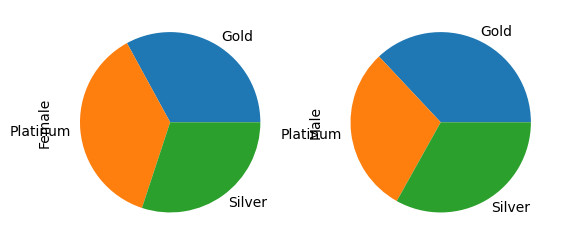

In [248]:

Gender_Segment.plot(kind = 'pie',subplots=True,legend =False)
plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [249]:
Driver_issue = Cust_Claims.loc[Cust_Claims['incident_cause'].isin(['Driver error','Other driver error'])]

In [250]:
Gender_Incident = pd.pivot_table(data =Driver_issue,index='gender',values='incident_cause',aggfunc='count')

In [251]:
Gender_Incident

,incident_cause
gender,
Female,221
Male,280


<Axes: xlabel='gender'>

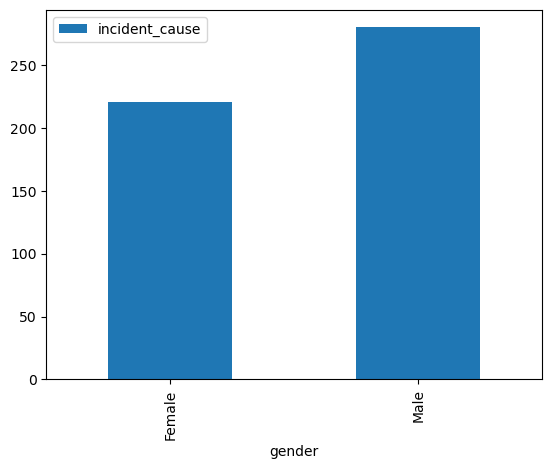

In [252]:
Gender_Incident.plot(kind='bar')

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [253]:
Age_fraudulent = Cust_Claims.groupby('Age_Category')['fraudulent'].count().reset_index()

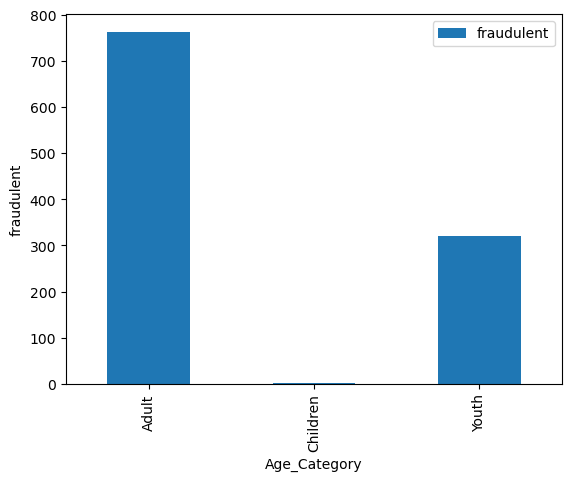

In [254]:
Age_fraudulent.plot(kind='bar',x='Age_Category',y='fraudulent')
plt.ylabel('fraudulent')
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [255]:
Monthly_Amount = Cust_Claims.groupby('claim_date')['claim_amount'].sum().reset_index()

In [256]:
Monthly_Amount['Months'] = Monthly_Amount['claim_date'].dt.month

In [257]:
Monthly_Amount

,claim_date,claim_amount,Months
0,2017-01-01,203227.000000,1
1,2017-01-07,137763.500000,1
2,2017-01-14,138807.500000,1
3,2017-01-21,72576.497038,1
4,2017-01-27,57927.998519,1
...,...,...,...
96,2018-10-03,162797.498519,10
97,2018-10-09,225007.500000,10
98,2018-10-16,119829.000000,10
99,2018-10-23,147083.997038,10


<Axes: xlabel='Months'>

<Figure size 1300x600 with 0 Axes>

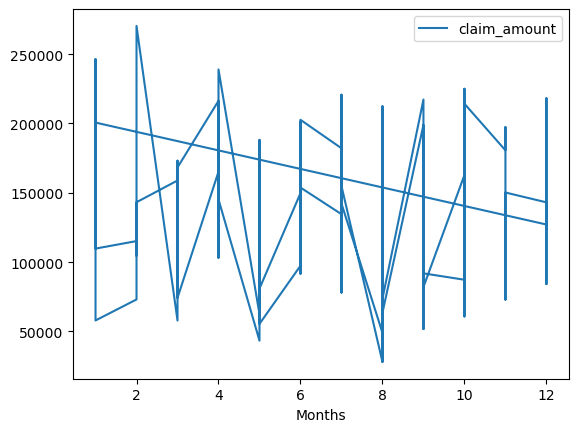

In [258]:
plt.figure(figsize=(13,6))
Monthly_Amount.plot(kind='line',x='Months',y='claim_amount')



#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [259]:
Cust_Claims.groupby(['gender','Age_Category','fraudulent'])['claim_amount'].sum().reset_index()

,gender,Age_Category,fraudulent,claim_amount
0,Female,Adult,No,3.524569e+06
1,Female,Adult,Yes,1.123669e+06
2,Female,Children,No,2.020000e+04
3,Female,Youth,No,1.500253e+06
4,Female,Youth,Yes,2.714870e+05
5,Male,Adult,No,3.706210e+06
6,Male,Adult,Yes,1.416162e+06
7,Male,Children,No,2.461000e+04
8,Male,Youth,No,1.537355e+06
9,Male,Youth,Yes,4.059750e+05


In [260]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_compat', '_core', '_decorators', '_docstrings', '_oldcore', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_pale

#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

#### 16. Is there any similarity in the amount claimed by males and females?

In [261]:
# First we need to filter the data
Female_Claimed = Cust_Claims.loc[Cust_Claims.gender == 'Female','claim_amount']
Male_Claimed = Cust_Claims.loc[Cust_Claims.gender == 'Male','claim_amount']

In [262]:
# Finding mean of gender
Female_Claimed.mean()

12105.597649726487

In [263]:
Male_Claimed.mean()

12821.54239372783

In [264]:
# The above 2 are continuous variables so I'm using t-test
stats.ttest_ind(Male_Claimed,Female_Claimed)

TtestResult(statistic=0.8848199716864555, pvalue=0.37645013430168395, df=1083.0)

In [345]:
# pvalue is greaterthan 0.05 so we fail to reject the null hypothesis

#### 17. Is there any relationship between age category and segment?


In [265]:
# Creting a crosstab because 2 are categorical variables

observed = pd.crosstab(Cust_Claims.Segment,Cust_Claims.Age_Category)

In [266]:
observed

Age_Category,Adult,Children,Youth
Segment,,,
Gold,269,1,102
Platinum,246,1,117
Silver,248,0,101


In [267]:
# Age_Category and segment are categorical variables so I'm using chi-square test

stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=3.0188850979195774, pvalue=0.5546700133906691, dof=4, expected_freq=array([[261.6       ,   0.68571429, 109.71428571],
       [255.97419355,   0.67096774, 107.35483871],
       [245.42580645,   0.64331797, 102.93087558]]))

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [268]:
# Start_date
Cust_Claims['claim_date'].min()

Timestamp('2017-01-01 00:00:00')

In [269]:
# End_date
Cust_Claims['claim_date'].max()

Timestamp('2018-10-30 00:00:00')

In [270]:
# Data from 2017-jan to 2017-dec 
Difference = Cust_Claims.loc[(Cust_Claims['claim_date']>'2017-01-01') &(Cust_Claims['claim_date']<'2018-01-01')]

In [271]:
Difference['claim_amount'].mean()

12203.866459005896

In [272]:
# one continuous variable so I'm using t-test
stats.ttest_1samp(Difference.claim_amount,10000)

TtestResult(statistic=4.057286840259475, pvalue=5.6312612581326626e-05, df=591)

In [365]:
# pvalue is too small we reject the null hypothesis

#### 19. Is there any difference between age groups and insurance claims?

In [273]:
# First look at the age_category with claim_amount count
Cust_Claims.groupby('Age_Category')['claim_amount'].count()

Age_Category
Adult       763
Children      2
Youth       320
Name: claim_amount, dtype: int64

In [274]:
# For f_one way we need to pass atleast 2 samples for that i have created seperate age_groups        
Adult = Cust_Claims.loc[Cust_Claims['Age_Category']=='Adult','claim_amount']
Youth = Cust_Claims.loc[Cust_Claims['Age_Category']=='Youth','claim_amount']
Children = Cust_Claims.loc[Cust_Claims['Age_Category']=='Children','claim_amount']

In [275]:
stats.f_oneway(Adult,Youth,Children)

F_onewayResult(statistic=1.4667039693706125, pvalue=0.2311428488037448)

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [276]:
# there are 2 continuous variables and need the realtionship betweem them so I'm using pearson's correlation

stats.pearsonr(Cust_Claims['total_policy_claims'],Cust_Claims['claim_amount'])

PearsonRResult(statistic=-0.014788606119054987, pvalue=0.6265474918944435)